In [1]:
pip install requests beautifulsoup4 requests-html


  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.4/83.4 kB 1.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.8/143.8 kB 909.2 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 807.0 kB/s eta 0:00:00
  Created wheel for bs4: filename=bs4-0.0.1-py3-none-any.whl size=1256 sha256=976693cea1e9e3a1434eab8448942fe2a877a0b6eef1245137f148c9e447e210
  Stored in directory: /root/.cache/pip/wheels/25/42/45/b773edc52acb16cd2db4cf1a0b47117e2f69bb4eb300ed0e70
Successfully built bs4
  Attempting uninstall: urllib3
    Found existing installation: urllib3 2.0.7
    Uninstalling urllib3-2.0.7:
      Successfully uninstalled urllib3-2.0.7


requests-html is not automatically installed in google colab. Hence the installation up above using pip. We will also find that Tensor Flow and some other noteworth libraries are not installed. so you will need to use pip when using the co-lab for some libraries.
Next we import some libraries we may need although we didn't end up using nltk today  

In [2]:
import pandas as pd
from urllib.parse import urlparse
import numpy as np
import nltk.data
from requests_html import HTMLSession

Below we define a function that we didn't end up using today. This one just takes a single URL as input and returns the main text. You may find this one or the next one more useful for scraping some pages. Additionally it will help to always be defining new functions for web-scraping.

In [3]:
def get_and_parse(url):
  response = requests.get(url)

# Parse the HTML content with Beautiful Soup
  soup = BeautifulSoup(response.content, 'html.parser')

# Remove unwanted elements (script, style, comments, etc.)
  for element in soup(['script', 'style', 'comment']):
      element.extract()

# Extract the visible text
  text = soup.get_text(separator=' ')
  return text

This next function takes two inputs: url and element. In this case you can specify which element you want to scrape. Be it an 'a' [anchor] element, a 'p' [paragraph] element, and so on. What it returns should be a list of all such elements on the page including all the elements and attributes that they contain. From each extracted element we can obtain the attributes and elements that it contains and store those in an object.

In [12]:
def parse_elements(url,element):
    session = HTMLSession()
    r = session.get(url)
    elements = r.html.find(element)
    return elements

Next our good old sentiment detection that uses some comprehensions and optimized if/else logic to return the right sentiment. Note this is a rules based approach that flags sentiment soley based on whether or not key words have been found.

In [5]:
def sentiment_detection(sentence):
    positive_words = ('happy', 'sunny', 'positive', 'triumphant', 'optimistic', 'wonderful', 'significant', 'achieve','capabilities','progress','prized')
    negative_words = ('sad', 'terrible', 'frightening', 'rainy', 'scary', 'shocked', 'critical','bottlenecked')

    positive = any(sentence.count(i) > 0 for i in positive_words)
    negative = any(sentence.count(i) > 0 for i in negative_words)

    if positive == negative == False:
        return "neutral"
    elif positive != negative:
        return "positive" if positive else "negative"
    else:
        return "mixed"

We can re-purpose this approach for topic detection as seen with the next function.

In [6]:
def topic_detection(sentence):
    DataScience_words = ('data science', 'regression', 'predict', 'predictive', 'classify')
    AI_words = ('AI', 'machine learning', 'ml', 'ML', 'NLP', 'LLM','deep learning','neural network','generative', 'GPT-3','GPT-4')
    DataWords = ('analysis', 'algorithms','data','data structure','data-structure','big data','SQL','pandas')
    DataScience = any(sentence.count(i) > 0 for i in DataScience_words)
    AI = any(sentence.count(i) > 0 for i in AI_words)
    data = any(sentence.count(i) > 0 for i in DataWords)
    topics = []
    if DataScience == True:
        topics.append("Data Science")
    if AI == True:
        topics.append("AI")
    if data == True:
        topics.append("data")
    return topics

Below we parse the paragraph elements and anchor elements from this article

In [13]:
url = 'https://medium.com/towards-data-science/ai-scaling-why-keeping-up-is-essential-and-how-to-do-it-56be3c2e1e5'
paragraphs = parse_elements(url, 'p')
links = parse_elements(url, 'a')

In [14]:
(paragraphs)

[<Element 'p' class=('be', 'b', 'dw', 'dx', 'dy', 'dz', 'ea', 'eb', 'ec', 'ed', 'ee', 'ef', 'dt')>,
 <Element 'p' class=('be', 'b', 'dw', 'dx', 'dy', 'dz', 'ea', 'eb', 'ec', 'ed', 'ee', 'ef', 'dt')>,
 <Element 'p' class=('be', 'b', 'dw', 'dx', 'dy', 'dz', 'ea', 'eb', 'ec', 'ed', 'ee', 'ef', 'dt')>,
 <Element 'p' class=('be', 'b', 'dw', 'dx', 'dy', 'dz', 'ea', 'eb', 'ec', 'ed', 'ee', 'ef', 'dt')>,
 <Element 'p' class=('be', 'b', 'ji', 'jj', 'bj')>,
 <Element 'p' class=('be', 'b', 'ji', 'jj', 'dt')>,
 <Element 'p' class=('be', 'b', 'bf', 'z', 'kc', 'kd', 'ke', 'kf', 'kg', 'kh', 'ki', 'kj', 'bj')>,
 <Element 'p' class=('be', 'b', 'du', 'z', 'dt')>,
 <Element 'p' class=('be', 'b', 'du', 'z', 'dt')>,
 <Element 'p' class=('be', 'b', 'bf', 'z', 'dt')>,
 <Element 'p' class=('be', 'b', 'bf', 'z', 'dt')>,
 <Element 'p' id='2734' class=('pw-post-body-paragraph', 'ok', 'ol', 'gr', 'om', 'b', 'hv', 'on', 'oo', 'op', 'hy', 'oq', 'or', 'os', 'ot', 'ou', 'ov', 'ow', 'ox', 'oy', 'oz', 'pa', 'pb', 'pc',

In [15]:

#requirements: print out a topic analysis after every paragraph prints out
#dictionary that has two lists, one for the paragraphs, and one for topics covered by those paragraphs
#print(paragraphs)
p_dictionary = {}
p_list = []
topic_list = []
for p in range(0, len(paragraphs)):
    if len(paragraphs[p].text) > 50:
      #print((paragraphs[p].text))
      #print(f"TALKS ABOUT: {topic_detection(paragraphs[p].text)}")
      p_list.append(paragraphs[p].text)
      topic_list.append(topic_detection(paragraphs[p].text))
p_dictionary['Paragraphs'] = p_list
p_dictionary['Topics'] = topic_list

In [18]:
p_dictionary['Topics']

[['AI'],
 ['AI'],
 ['AI', 'data'],
 ['AI'],
 ['AI'],
 ['AI', 'data'],
 ['AI', 'data'],
 ['AI'],
 ['AI', 'data'],
 ['AI'],
 ['AI'],
 ['AI']]

In [19]:
medium_df = pd.DataFrame(p_dictionary)

In [20]:
medium_df.head(9)

,Paragraphs,Topics
0,"GPT-3 came out in early 2020, and shocked the ...",[AI]
1,"For the first time, we had an AI system that c...",[AI]
2,And it did all thing thanks simply to its scal...,"[AI, data]"
3,The idea that simply by scaling a simple trans...,[AI]
4,"Since then, dozens of other companies have put...",[AI]
5,The one-fringe AI scaling strategy that OpenAI...,"[AI, data]"
6,And there’s no end in sight: as the dizzying p...,"[AI, data]"
7,Missing out on just one of these developments ...,[AI]
8,Keeping up with the current state of the art i...,"[AI, data]"


We could take a more vectorized path to creating the above data-frame


In [21]:
medium_df2 = pd.DataFrame({'Paragraph_Elements':paragraphs})

In [22]:
medium_df2.head()

,Paragraph_Elements
0,"<Element 'p' class=('be', 'b', 'dw', 'dx', 'dy..."
1,"<Element 'p' class=('be', 'b', 'dw', 'dx', 'dy..."
2,"<Element 'p' class=('be', 'b', 'dw', 'dx', 'dy..."
3,"<Element 'p' class=('be', 'b', 'dw', 'dx', 'dy..."
4,"<Element 'p' class=('be', 'b', 'ji', 'jj', 'bj')>"


In [23]:
medium_df2['Paragraph_Text'] = medium_df2['Paragraph_Elements'].apply(lambda paragraph:paragraph.text)

In [24]:
medium_df2.head()

,Paragraph_Elements,Paragraph_Text
0,"<Element 'p' class=('be', 'b', 'dw', 'dx', 'dy...",Sign up
1,"<Element 'p' class=('be', 'b', 'dw', 'dx', 'dy...",Sign in
2,"<Element 'p' class=('be', 'b', 'dw', 'dx', 'dy...",Sign up
3,"<Element 'p' class=('be', 'b', 'dw', 'dx', 'dy...",Sign in
4,"<Element 'p' class=('be', 'b', 'ji', 'jj', 'bj')>",Jeremie Harris


In [25]:
medium_df2['Topics'] = medium_df2['Paragraph_Text'].apply(topic_detection)

In [26]:
medium_df2.head()

,Paragraph_Elements,Paragraph_Text,Topics
0,"<Element 'p' class=('be', 'b', 'dw', 'dx', 'dy...",Sign up,[]
1,"<Element 'p' class=('be', 'b', 'dw', 'dx', 'dy...",Sign in,[]
2,"<Element 'p' class=('be', 'b', 'dw', 'dx', 'dy...",Sign up,[]
3,"<Element 'p' class=('be', 'b', 'dw', 'dx', 'dy...",Sign in,[]
4,"<Element 'p' class=('be', 'b', 'ji', 'jj', 'bj')>",Jeremie Harris,[]


In [27]:
medium_df2['Character Count'] = medium_df2['Paragraph_Text'].apply(lambda x: len(x))

In [28]:
medium_df2.head()

,Paragraph_Elements,Paragraph_Text,Topics,Character Count
0,"<Element 'p' class=('be', 'b', 'dw', 'dx', 'dy...",Sign up,[],7
1,"<Element 'p' class=('be', 'b', 'dw', 'dx', 'dy...",Sign in,[],7
2,"<Element 'p' class=('be', 'b', 'dw', 'dx', 'dy...",Sign up,[],7
3,"<Element 'p' class=('be', 'b', 'dw', 'dx', 'dy...",Sign in,[],7
4,"<Element 'p' class=('be', 'b', 'ji', 'jj', 'bj')>",Jeremie Harris,[],14


In [29]:
medium_df2 = medium_df2[medium_df2['Character Count'] >= 50]

In [30]:
medium_df2

,Paragraph_Elements,Paragraph_Text,Topics,Character Count
11,<Element 'p' id='2734' class=('pw-post-body-pa...,"GPT-3 came out in early 2020, and shocked the ...",[AI],52
12,<Element 'p' id='594c' class=('pw-post-body-pa...,"For the first time, we had an AI system that c...",[AI],251
13,<Element 'p' id='8d66' class=('pw-post-body-pa...,And it did all thing thanks simply to its scal...,"[AI, data]",318
14,<Element 'p' id='8c9f' class=('pw-post-body-pa...,The idea that simply by scaling a simple trans...,[AI],456
15,<Element 'p' id='d7fb' class=('pw-post-body-pa...,"Since then, dozens of other companies have put...",[AI],510
16,<Element 'p' id='5517' class=('pw-post-body-pa...,The one-fringe AI scaling strategy that OpenAI...,"[AI, data]",493
17,<Element 'p' id='59ca' class=('pw-post-body-pa...,And there’s no end in sight: as the dizzying p...,"[AI, data]",541
18,<Element 'p' id='a3cf' class=('pw-post-body-pa...,Missing out on just one of these developments ...,[AI],160
19,<Element 'p' id='0313' class=('pw-post-body-pa...,Keeping up with the current state of the art i...,"[AI, data]",289
20,<Element 'p' id='3147' class=('pw-post-body-pa...,This immediately implies that one of the most ...,[AI],614


In [31]:
medium_df['Character Count'] = medium_df['Paragraphs'].apply(lambda x: len(x))


In [32]:
medium_df.head(10)

,Paragraphs,Topics,Character Count
0,"GPT-3 came out in early 2020, and shocked the ...",[AI],52
1,"For the first time, we had an AI system that c...",[AI],251
2,And it did all thing thanks simply to its scal...,"[AI, data]",318
3,The idea that simply by scaling a simple trans...,[AI],456
4,"Since then, dozens of other companies have put...",[AI],510
5,The one-fringe AI scaling strategy that OpenAI...,"[AI, data]",493
6,And there’s no end in sight: as the dizzying p...,"[AI, data]",541
7,Missing out on just one of these developments ...,[AI],160
8,Keeping up with the current state of the art i...,"[AI, data]",289
9,This immediately implies that one of the most ...,[AI],614


In [33]:
medium_df['Topic Count'] = medium_df['Topics'].apply(len)
medium_df.head()

,Paragraphs,Topics,Character Count,Topic Count
0,"GPT-3 came out in early 2020, and shocked the ...",[AI],52,1
1,"For the first time, we had an AI system that c...",[AI],251,1
2,And it did all thing thanks simply to its scal...,"[AI, data]",318,2
3,The idea that simply by scaling a simple trans...,[AI],456,1
4,"Since then, dozens of other companies have put...",[AI],510,1


In [34]:
medium_df['Sentiment'] = medium_df['Paragraphs'].apply(sentiment_detection)

In [35]:
medium_df.head(10)

,Paragraphs,Topics,Character Count,Topic Count,Sentiment
0,"GPT-3 came out in early 2020, and shocked the ...",[AI],52,1,negative
1,"For the first time, we had an AI system that c...",[AI],251,1,neutral
2,And it did all thing thanks simply to its scal...,"[AI, data]",318,2,neutral
3,The idea that simply by scaling a simple trans...,[AI],456,1,positive
4,"Since then, dozens of other companies have put...",[AI],510,1,mixed
5,The one-fringe AI scaling strategy that OpenAI...,"[AI, data]",493,2,positive
6,And there’s no end in sight: as the dizzying p...,"[AI, data]",541,2,positive
7,Missing out on just one of these developments ...,[AI],160,1,negative
8,Keeping up with the current state of the art i...,"[AI, data]",289,2,neutral
9,This immediately implies that one of the most ...,[AI],614,1,mixed


In [36]:
category_amount = medium_df['Sentiment'].value_counts()
print(category_amount)
print(list(category_amount))
print(list(category_amount.keys()))

neutral     5
positive    3
negative    2
mixed       2
Name: Sentiment, dtype: int64
[5, 3, 2, 2]
['neutral', 'positive', 'negative', 'mixed']


Next we want to create a dummy variable for AI and maybe data and any of those topics

In [37]:
#this is a brittle approach. It happens to work in this case.
medium_df['AI'] = np.where('AI' in medium_df['Topics'][0], 1, 0)

In [38]:
medium_df.head(9)

,Paragraphs,Topics,Character Count,Topic Count,Sentiment,AI
0,"GPT-3 came out in early 2020, and shocked the ...",[AI],52,1,negative,1
1,"For the first time, we had an AI system that c...",[AI],251,1,neutral,1
2,And it did all thing thanks simply to its scal...,"[AI, data]",318,2,neutral,1
3,The idea that simply by scaling a simple trans...,[AI],456,1,positive,1
4,"Since then, dozens of other companies have put...",[AI],510,1,mixed,1
5,The one-fringe AI scaling strategy that OpenAI...,"[AI, data]",493,2,positive,1
6,And there’s no end in sight: as the dizzying p...,"[AI, data]",541,2,positive,1
7,Missing out on just one of these developments ...,[AI],160,1,negative,1
8,Keeping up with the current state of the art i...,"[AI, data]",289,2,neutral,1


In [39]:
medium_df['Data'] = np.where('data' in medium_df['Topics'], 1, 0)
#doesn't work as expected^ here we see how this is brittle

In [40]:
medium_df

,Paragraphs,Topics,Character Count,Topic Count,Sentiment,AI,Data
0,"GPT-3 came out in early 2020, and shocked the ...",[AI],52,1,negative,1,0
1,"For the first time, we had an AI system that c...",[AI],251,1,neutral,1,0
2,And it did all thing thanks simply to its scal...,"[AI, data]",318,2,neutral,1,0
3,The idea that simply by scaling a simple trans...,[AI],456,1,positive,1,0
4,"Since then, dozens of other companies have put...",[AI],510,1,mixed,1,0
5,The one-fringe AI scaling strategy that OpenAI...,"[AI, data]",493,2,positive,1,0
6,And there’s no end in sight: as the dizzying p...,"[AI, data]",541,2,positive,1,0
7,Missing out on just one of these developments ...,[AI],160,1,negative,1,0
8,Keeping up with the current state of the art i...,"[AI, data]",289,2,neutral,1,0
9,This immediately implies that one of the most ...,[AI],614,1,mixed,1,0


In [43]:
'data' in [['data','ai'],1]

False

In [44]:
medium_df['Topics']

0           [AI]
1           [AI]
2     [AI, data]
3           [AI]
4           [AI]
5     [AI, data]
6     [AI, data]
7           [AI]
8     [AI, data]
9           [AI]
10          [AI]
11          [AI]
Name: Topics, dtype: object

In [ ]:
medium_df.head(9)

,Paragraphs,Topics,Character Count,Topic Count,Sentiment,AI,Data
0,"GPT-3 came out in early 2020, and shocked the ...",[AI],52,1,negative,1,0
1,"For the first time, we had an AI system that c...",[AI],251,1,neutral,1,0
2,And it did all thing thanks simply to its scal...,"[AI, data]",318,2,neutral,1,0
3,The idea that simply by scaling a simple trans...,[AI],456,1,positive,1,0
4,"Since then, dozens of other companies have put...",[AI],510,1,mixed,1,0
5,The one-fringe AI scaling strategy that OpenAI...,"[AI, data]",493,2,positive,1,0
6,And there’s no end in sight: as the dizzying p...,"[AI, data]",541,2,positive,1,0
7,Missing out on just one of these developments ...,[AI],160,1,negative,1,0
8,Keeping up with the current state of the art i...,"[AI, data]",289,2,neutral,1,0


In [45]:
#this is NOT brittle. this would have worked with the AI column, and it of course works on data.
medium_df['Data'] = medium_df['Topics'].apply(lambda x:1 if 'data' in x else 0)

In [46]:
medium_df['AI'] = medium_df['Topics'].apply(lambda x:1 if 'AI' in x else 0)

In [47]:
medium_df.head(9)

,Paragraphs,Topics,Character Count,Topic Count,Sentiment,AI,Data
0,"GPT-3 came out in early 2020, and shocked the ...",[AI],52,1,negative,1,0
1,"For the first time, we had an AI system that c...",[AI],251,1,neutral,1,0
2,And it did all thing thanks simply to its scal...,"[AI, data]",318,2,neutral,1,1
3,The idea that simply by scaling a simple trans...,[AI],456,1,positive,1,0
4,"Since then, dozens of other companies have put...",[AI],510,1,mixed,1,0
5,The one-fringe AI scaling strategy that OpenAI...,"[AI, data]",493,2,positive,1,1
6,And there’s no end in sight: as the dizzying p...,"[AI, data]",541,2,positive,1,1
7,Missing out on just one of these developments ...,[AI],160,1,negative,1,0
8,Keeping up with the current state of the art i...,"[AI, data]",289,2,neutral,1,1


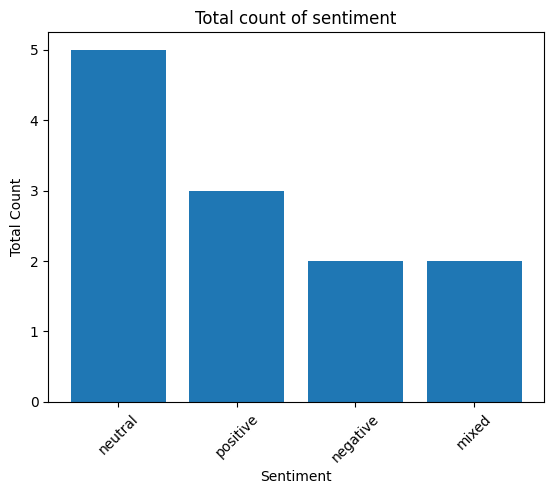

In [48]:
import matplotlib.pyplot as plt



# Extract category names and corresponding amounts
#categories = list(category_amount.keys())
#amounts = list(category_amount.values())

# Plotting the bar graph
plt.bar(list(category_amount.keys()), list(category_amount))

# Customize the plot
plt.xlabel('Sentiment')
plt.ylabel('Total Count')
plt.title('Total count of sentiment')
plt.xticks(rotation=45)

# Show the plot
plt.show()

In [49]:
topic_counts = [medium_df['AI'].sum(), medium_df['Data'].sum()]
topic_labels = ['AI', 'data']

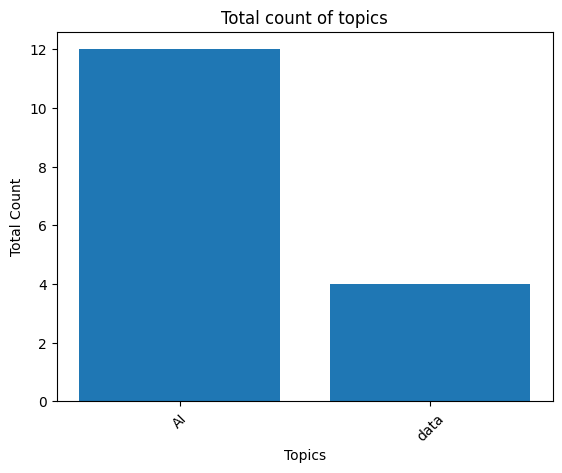

In [50]:
# Plotting the bar graph
plt.bar(topic_labels, topic_counts)

# Customize the plot
plt.xlabel('Topics')
plt.ylabel('Total Count')
plt.title('Total count of topics')
plt.xticks(rotation=45)

# Show the plot
plt.show()

In [59]:
reddit_url = 'https://www.reddit.com/r/dataanalysis/'
hyperlinks = parse_elements(reddit_url, 'a')

In [60]:
# Print the string versions of the hyperlinks
links_list = []
for hyperlink in hyperlinks:
    if len(hyperlink.absolute_links) > 0:
      if ((hyperlink.absolute_links).pop()).count('/r/dataanalysis/comments') > 0:
        #print("count is greater")
        if (hyperlink.absolute_links).pop() not in links_list:
          #print('not in list')
          links_list.append(((hyperlink.absolute_links).pop()))
          print((hyperlink.absolute_links).pop())


def get_threads(webdata,name):
  for hyperlink in webdata:
    if len(hyperlink.absolute_links) > 0:
      if ((hyperlink.absolute_links).pop()).count(f'/r/{name}/comments') > 0:
        print((hyperlink.absolute_links).pop())
      #let's add some code to add each hyperlink to a list!
      #then we can add the list to a dictionary and make it a pandas dataframe


In [57]:
links_list

[]

In [62]:
threads_dictionary = {}
for link in links_list:
  content = parse_elements(link, 'body')
  threads_dictionary[link] = content.pop()

In [63]:
threads_dictionary

{}

In [ ]:
(threads_dictionary['https://www.reddit.com/r/dataanalysis/comments/17mg6ep/megathread_how_to_get_into_data_analysis/'])

<Element 'body' class=('v2',)>

In [ ]:
(threads_dictionary['https://www.reddit.com/r/dataanalysis/comments/17mg6ep/megathread_how_to_get_into_data_analysis/']).find('p')

[<Element 'p' class=('px-md', 'pt-md', 'm-0', 'whitespace-normal', 'text-14', 'leading-5', 'font-normal')>,
 <Element 'p' >,
 <Element 'p' >,
 <Element 'p' >,
 <Element 'p' >,
 <Element 'p' >,
 <Element 'p' >,
 <Element 'p' >,
 <Element 'p' >,
 <Element 'p' >,
 <Element 'p' >,
 <Element 'p' >,
 <Element 'p' >,
 <Element 'p' >,
 <Element 'p' >,
 <Element 'p' >,
 <Element 'p' >,
 <Element 'p' >,
 <Element 'p' >,
 <Element 'p' >,
 <Element 'p' >,
 <Element 'p' >,
 <Element 'p' >,
 <Element 'p' >,
 <Element 'p' >,
 <Element 'p' >,
 <Element 'p' >]

In [ ]:
for i in range(0,len(((threads_dictionary['https://www.reddit.com/r/dataanalysis/comments/17mg6ep/megathread_how_to_get_into_data_analysis/']).find('p')))):
  print((threads_dictionary['https://www.reddit.com/r/dataanalysis/comments/17mg6ep/megathread_how_to_get_into_data_analysis/']).find('p')[i].text)

This is a place to discuss and post about data analysis. Rules: - Comments should remain civil and courteous. - All reddit-wide rules apply here. - Do not post personal information. - No facebook or social media links. - Do not spam. - No 3rd party URL shorteners - Questions related to career entry go in the monthly megathread. https://old.reddit.com/r/dataanalysis/comments/17mg6ep/megathread_how_to_get_into_data_analysis/
November 2023 Edition.
Rather than have hundreds of separate posts, each asking for individual help and advice, please post your career-entry questions in this thread. This thread is for questions asking for individualized career advice:
“How do I get into data analysis?” as a job or career.
“What courses should I take?”
“What certification, course, or training program will help me get a job?”
“How can I improve my resume?”
“Can someone review my portfolio / project / GitHub?”
“Can my degree in …….. get me a job in data analysis?”
“What questions will they ask in an 

In [ ]:
len((threads_dictionary['https://www.reddit.com/r/dataanalysis/comments/17mg6ep/megathread_how_to_get_into_data_analysis/']).find('p'))

27

In [ ]:
#we can build some code here to
# Convert dictionary to DataFrame
df = pd.DataFrame(some_dictionary)

# Print the DataFrame
print(df)

In [ ]:
#let's say we now want to iterate through each hyperlink for EACH thread and obtain the data from each thread and analyze it
#We can look at all the paragraphs to see what people are talking about
#perhaps we may want to see how often people are mentioning SPECIFIC topics
#We could repurpose our topic detection to look for even more topics
#it might make sense to get a topic COUNT rather than just a yes or no for a specific topic

In [ ]:
#takes a paragraph as string and breaks it down into sentences
def sentence_list(paragraph_string):
    tokenizer = nltk.data.load('tokenizers/punkt/english.pickle')
    list_of_sentences = tokenizer.tokenize(paragraph_string)
    return list_of_sentences

In [ ]:
pip install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 51.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 25.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 95.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 68.1 MB/s eta 0:00:00


In [ ]:
# Use a pipeline as a high-level helper
from transformers import pipeline

pipe = pipeline("text-classification", model="jonaskoenig/topic_classification_04")

Some layers from the model checkpoint at jonaskoenig/topic_classification_04 were not used when initializing TFBertForSequenceClassification: ['dropout_19']
- This IS expected if you are initializing TFBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertForSequenceClassification were initialized from the model checkpoint at jonaskoenig/topic_classification_04.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertForSequenceClassification for predictions without further training.


In [ ]:
# Load model directly
from transformers import AutoTokenizer, AutoModelForSequenceClassification

tokenizer = AutoTokenizer.from_pretrained("jonaskoenig/topic_classification_04")
model = AutoModelForSequenceClassification.from_pretrained("jonaskoenig/topic_classification_04", from_tf=True)


All TF 2.0 model weights were used when initializing BertForSequenceClassification.

All the weights of BertForSequenceClassification were initialized from the TF 2.0 model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use BertForSequenceClassification for predictions without further training.


In [ ]:
text = "This is about finance"
inputs = tokenizer.encode_plus(text, padding="longest", truncation=True, return_tensors="pt")


In [ ]:
outputs = model(**inputs)
logits = outputs.logits


In [ ]:
logits

tensor([[-1.5593,  0.2835, -1.5148,  3.3633, -0.4707, -1.9771,  4.4456, -2.2627,
         -2.6042, -0.2672]], grad_fn=<AddmmBackward0>)

In [ ]:
pip install tensorflow==2.12.


In [ ]:
text = "This is an example sentence."
inputs = tokenizer.encode_plus(text, padding="longest", truncation=True, return_tensors="pt")


In [ ]:
outputs = model(**inputs)
logits = outputs.logits
